In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import joblib
import gc
import warnings
warnings.filterwarnings('ignore')
sb.set()

In [2]:
directory = r"D:/Ubuntu_Files/Bright_ML_Project/2016"

data_16=pd.DataFrame()

# Iterate over all files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    
    for csv_file_name in os.listdir(file_path):
        csv_file_path=os.path.join(file_path, csv_file_name)
        if os.path.isfile(csv_file_path) and csv_file_name.endswith('.csv'):
            new_data=pd.read_csv(csv_file_path)
            data_16=data_16.append(new_data, ignore_index=True)

columns=data_16.columns
true_col=['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes', 'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15', 'ArrDelayMinutes', 'Origin', 'Dest']
drop_col=[]
for i in columns:
    if i not in true_col:
        drop_col.append(i)

data_16.drop(drop_col, axis=1, inplace=True)

true_airports=['ATL', 'CLT', 'DEN', 'DFW', 'EWR', 'IAH', 'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PHX', 'SEA', 'SFO']
drop_airports=[]

for i in data_16['Origin'].unique():
    if i not in true_airports:
        drop_airports.append(i)

for i in drop_airports:
    data_16=data_16[data_16['Origin']!=i]
    
drop_airports=[]

for i in data_16['Dest'].unique():
    if i not in true_airports:
        drop_airports.append(i)

for i in drop_airports:
    data_16=data_16[data_16['Dest']!=i]

In [3]:
directory = r"D:/Ubuntu_Files/Bright_ML_Project/2017"

data_17=pd.DataFrame()

# Iterate over all files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    
    for csv_file_name in os.listdir(file_path):
        csv_file_path=os.path.join(file_path, csv_file_name)
        if os.path.isfile(csv_file_path) and csv_file_name.endswith('.csv'):
            new_data=pd.read_csv(csv_file_path)
            data_17=data_17.append(new_data, ignore_index=True)

columns=data_17.columns
true_col=['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes', 'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15', 'ArrDelayMinutes' ,'Origin', 'Dest']
drop_col=[]
for i in columns:
    if i not in true_col:
        drop_col.append(i)

data_17.drop(drop_col, axis=1, inplace=True)

true_airports=['ATL', 'CLT', 'DEN', 'DFW', 'EWR', 'IAH', 'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PHX', 'SEA', 'SFO']
drop_airports=[]

for i in data_17['Origin'].unique():
    if i not in true_airports:
        drop_airports.append(i)

for i in drop_airports:
    data_17=data_17[data_17['Origin']!=i]
    
drop_airports=[]

for i in data_17['Dest'].unique():
    if i not in true_airports:
        drop_airports.append(i)

for i in drop_airports:
    data_17=data_17[data_17['Dest']!=i]

In [4]:
flight_data=pd.DataFrame()

flight_data=flight_data.append(data_16, ignore_index=True)
flight_data=flight_data.append(data_17, ignore_index=True)

flight_data

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15
0,2016,1,1,1,2016-01-01,14747,SEA,12478,JFK,745,741.0,0.0,0.0,1602,1610.0,8.0,0.0
1,2016,1,1,2,2016-01-02,14747,SEA,12478,JFK,745,737.0,0.0,0.0,1602,1613.0,11.0,0.0
2,2016,1,1,3,2016-01-03,14747,SEA,12478,JFK,745,743.0,0.0,0.0,1602,1547.0,0.0,0.0
3,2016,1,1,4,2016-01-04,14747,SEA,12478,JFK,745,737.0,0.0,0.0,1602,1551.0,0.0,0.0
4,2016,1,1,5,2016-01-05,14747,SEA,12478,JFK,710,708.0,0.0,0.0,1527,1524.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2017,3,9,25,2017-09-25,14771,SFO,12478,JFK,2045,2038.0,0.0,0.0,522,449.0,0.0,0.0
1877292,2017,3,9,25,2017-09-25,11618,EWR,13204,MCO,1205,1200.0,0.0,0.0,1449,1428.0,0.0,0.0
1877293,2017,3,9,25,2017-09-25,13204,MCO,11618,EWR,1141,1143.0,2.0,0.0,1417,1409.0,0.0,0.0
1877294,2017,3,9,25,2017-09-25,12889,LAS,12478,JFK,2159,2157.0,0.0,0.0,557,540.0,0.0,0.0


In [5]:
weather=pd.read_csv(r"D:/Ubuntu_Files/Bright_ML_Project/weather_raw.csv")

true_col=['windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'date', 'time', 'airport' ,'Origin']
del_col=[]

for i in weather.columns:
    if i not in true_col:
        del_col.append(i)
        
weather.drop(del_col, axis=1, inplace=True)
weather

,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity,time,Origin,date
0,11,47,100,0.1,1023,17,10,176,49,46,318,91,0,ATL,2016-01-01
1,13,44,100,0.0,1023,22,10,176,46,42,317,92,100,ATL,2016-01-01
2,14,41,100,0.0,1023,26,10,122,43,38,315,92,200,ATL,2016-01-01
3,16,38,100,0.0,1023,30,10,122,40,33,314,93,300,ATL,2016-01-01
4,17,38,100,0.0,1023,30,10,122,40,33,314,93,400,ATL,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263155,26,57,0,0.0,1014,27,10,113,67,67,296,70,1900,SFO,2017-09-30
263156,26,58,0,0.0,1014,27,10,113,67,67,298,71,2000,SFO,2017-09-30
263157,26,58,0,0.0,1014,27,10,113,67,67,300,73,2100,SFO,2017-09-30
263158,23,58,0,0.0,1014,25,10,113,66,66,302,74,2200,SFO,2017-09-30


In [6]:
weather.rename(columns={'time': 'CRSDepTime'}, inplace=True)
weather.rename(columns={'date': 'FlightDate'}, inplace=True)
weather_new=weather.copy()

In [7]:
def round_time(time):
    hour = time//100
    minute = time%100
    
    if minute >= 30:
        hour += 1
    
    return hour*100

flight_data['CRSDepTime'] = flight_data['CRSDepTime'].apply(round_time)
flight_data['CRSArrTime'] = flight_data['CRSArrTime'].apply(round_time)

In [8]:
merged_data=pd.merge(flight_data, weather_new, on=['CRSDepTime', 'Origin', 'FlightDate'], how='inner')

In [9]:
merged_data = merged_data.dropna(subset=['DepTime', 'DepDelayMinutes', 'DepDel15', 'ArrDel15', 'ArrTime', 'ArrDelayMinutes'])
merged_data

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,...,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity
0,2016,1,1,1,2016-01-01,14747,SEA,12478,JFK,800,...,0,0.0,1030,8,10,113,34,29,108,65
1,2016,1,1,1,2016-01-01,14747,SEA,14107,PHX,800,...,0,0.0,1030,8,10,113,34,29,108,65
2,2016,1,1,1,2016-01-01,14747,SEA,11292,DEN,800,...,0,0.0,1030,8,10,113,34,29,108,65
3,2016,1,1,1,2016-01-01,14747,SEA,12266,IAH,800,...,0,0.0,1030,8,10,113,34,29,108,65
4,2016,1,1,1,2016-01-01,14747,SEA,10397,ATL,800,...,0,0.0,1030,8,10,113,34,29,108,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857882,2017,3,9,23,2017-09-23,12478,JFK,13204,MCO,2100,...,0,0.0,1017,15,10,113,86,86,1,55
1857883,2017,3,9,23,2017-09-23,12478,JFK,12892,LAX,2200,...,0,0.0,1017,14,10,113,84,84,41,58
1857884,2017,3,9,24,2017-09-24,13204,MCO,11618,EWR,2200,...,5,0.0,1012,15,10,113,81,81,44,78
1857885,2017,3,9,24,2017-09-24,12478,JFK,12892,LAX,2200,...,14,0.0,1017,10,10,113,74,74,192,87


In [10]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from joblib import parallel_backend
import dill
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [11]:
merged_new = pd.get_dummies(merged_data, columns=['Year', 'Quarter', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID', 'Origin', 'CRSDepTime', 'CRSArrTime', 'visibility', 'weatherCode'])

In [12]:
merged_new.drop(['DepTime', 'DepDelayMinutes' ,'FlightDate', 'Dest', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15'], axis=1, inplace=True)
merged_new

,DepDel15,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,WindGustKmph,tempF,WindChillF,winddirDegree,...,weatherCode_353,weatherCode_356,weatherCode_359,weatherCode_362,weatherCode_365,weatherCode_368,weatherCode_371,weatherCode_386,weatherCode_389,weatherCode_395
0,0.0,7,23,0,0.0,1030,8,34,29,108,...,0,0,0,0,0,0,0,0,0,0
1,0.0,7,23,0,0.0,1030,8,34,29,108,...,0,0,0,0,0,0,0,0,0,0
2,0.0,7,23,0,0.0,1030,8,34,29,108,...,0,0,0,0,0,0,0,0,0,0
3,0.0,7,23,0,0.0,1030,8,34,29,108,...,0,0,0,0,0,0,0,0,0,0
4,0.0,7,23,0,0.0,1030,8,34,29,108,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857882,0.0,12,68,0,0.0,1017,15,86,86,1,...,0,0,0,0,0,0,0,0,0,0
1857883,0.0,11,67,0,0.0,1017,14,84,84,41,...,0,0,0,0,0,0,0,0,0,0
1857884,1.0,12,73,5,0.0,1012,15,81,81,44,...,0,0,0,0,0,0,0,0,0,0
1857885,1.0,3,70,14,0.0,1017,10,74,74,192,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X = merged_new.drop('DepDel15', axis=1)
y = merged_new['DepDel15']

In [14]:
ros = RandomOverSampler(random_state=0)

X, y = ros.fit_resample(X, y)

In [15]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [16]:
et = joblib.load(r'C:\Users\Admin\Desktop\et_new_model.joblib')
et_pred=et.predict(X)

In [18]:
del X
del y

Now lets perform regression analysis

In [19]:
X = merged_data.drop('DepDel15', axis=1)
y = merged_data['DepDel15']

In [20]:
ros = RandomOverSampler(random_state=0)

X, y = ros.fit_resample(X, y)

In [21]:
X['DepDel15']=et_pred

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [23]:
merged_data=X.drop(['DepTime','Origin', 'Dest'], axis=1)

merged_data['flights_per_day'] = merged_data.groupby(['FlightDate', 'OriginAirportID'])['FlightDate'].transform('count')

merged_data['OriginAirportID']=merged_data['OriginAirportID'].astype('object')
merged_data['DestAirportID']=merged_data['DestAirportID'].astype('object')
merged_data['visibility']=merged_data['visibility'].astype('object')
merged_data['weatherCode']=merged_data['weatherCode'].astype('object')

In [24]:
merged_data=merged_data[merged_data['DepDel15']==1]

In [25]:
# Define your features and target variable
features = merged_data.drop(['DepDelayMinutes'], axis=1)
target = merged_data['DepDelayMinutes']

In [26]:
xgb_reg=joblib.load(r"C:\Users\Admin\Desktop\xgbreg_new_model.joblib")

In [27]:
y_pred=xgb_reg.predict(features)

In [28]:
# Evaluate the model
mae_test = mean_absolute_error(target, y_pred)
r2_test = r2_score(target, y_pred)
mse_test=mean_squared_error(target, y_pred)


print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

Mean Absolute Error:  3.1144701594329667
R2 Score:  0.9940162895843113
Mean Squared Error:  31.63833509575714


In [64]:
lgbm_reg=joblib.load(r"C:\Users\Admin\Desktop\lgbmreg_new_model.joblib")

In [65]:
y_pred=lgbm_reg.predict(features)

In [66]:
# Evaluate the model
mae_test = mean_absolute_error(target, y_pred)
r2_test = r2_score(target, y_pred)
mse_test=mean_squared_error(target, y_pred)


print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

Mean Absolute Error:  10.897981572391654
R2 Score:  0.9564592382414904
Mean Squared Error:  230.21789410604507


In [ ]:
rf_reg=joblib.load(r"C:\Users\Admin\Desktop\rfreg_new_model.joblib")

In [ ]:
y_pred=rf_reg.predict(features)

In [ ]:
# Evaluate the model
mae_test = mean_absolute_error(target, y_pred)
r2_test = r2_score(target, y_pred)
mse_test=mean_squared_error(target, y_pred)


print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

In [32]:
lin_reg=joblib.load(r"C:\Users\Admin\Desktop\linreg_new_model.joblib")

In [33]:
y_pred=lin_reg.predict(features)

In [34]:
# Evaluate the model
mae_test = mean_absolute_error(target, y_pred)
r2_test = r2_score(target, y_pred)
mse_test=mean_squared_error(target, y_pred)


print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

Mean Absolute Error:  11.422233929807033
R2 Score:  0.950126699166226
Mean Squared Error:  263.7006296249448


In [35]:
dt_reg=joblib.load(r"C:\Users\Admin\Desktop\dtreg_new_model.joblib")

In [36]:
y_pred=dt_reg.predict(features)

In [37]:
# Evaluate the model
mae_test = mean_absolute_error(target, y_pred)
r2_test = r2_score(target, y_pred)
mse_test=mean_squared_error(target, y_pred)


print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

Mean Absolute Error:  11.433760219859272
R2 Score:  0.9509446691695262
Mean Squared Error:  259.37568619271656


In [38]:
merged_data['DepDelayMinutes'].unique

<bound method Series.unique of 5          20.0
16         19.0
17         23.0
27         20.0
28         59.0
           ... 
2929143    98.0
2929144    15.0
2929145    21.0
2929146    42.0
2929147    70.0
Name: DepDelayMinutes, Length: 1532954, dtype: float64>

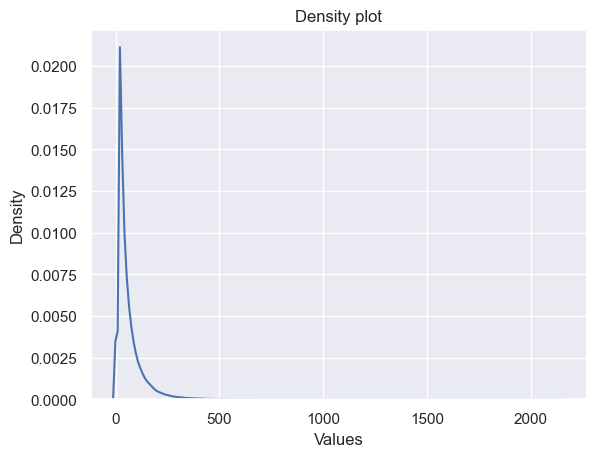

In [39]:
import seaborn as sns

# Assume that 'data' is a 1-dimensional array-like object containing your data.
data = merged_data['DepDelayMinutes']  # Uncomment and replace with your actual DataFrame and column

sns.kdeplot(data)

plt.title('Density plot')
plt.xlabel('Values')
plt.ylabel('Density')

plt.show()


In [40]:
len(merged_data[(merged_data['DepDelayMinutes'] > 15) & (merged_data['DepDelayMinutes'] < 100)])

1157252

In [41]:
X_1 = merged_data[(merged_data['DepDelayMinutes'] > 15) & (merged_data['DepDelayMinutes'] < 100)]
y_1=X_1['DepDelayMinutes']
X_1=X_1.drop(columns=['DepDelayMinutes'])

In [42]:
y_pred_1=xgb_reg.predict(X_1)

In [43]:
# Evaluate the model
mae_test = mean_absolute_error(y_1, y_pred_1)
r2_test = r2_score(y_1, y_pred_1)
mse_test=mean_squared_error(y_1, y_pred_1)


print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

Mean Absolute Error:  2.2192252425754733
R2 Score:  0.9774404065873581
Mean Squared Error:  10.984766163805126


In [44]:
len(merged_data[(merged_data['DepDelayMinutes'] > 100) & (merged_data['DepDelayMinutes'] < 200)])

186754

In [45]:
X_2 = merged_data[(merged_data['DepDelayMinutes'] > 100) & (merged_data['DepDelayMinutes'] < 200)]
y_2=X_2['DepDelayMinutes']
X_2=X_2.drop(columns=['DepDelayMinutes'])

In [46]:
y_pred_2=xgb_reg.predict(X_2)

In [47]:
# Evaluate the model
mae_test = mean_absolute_error(y_2, y_pred_2)
r2_test = r2_score(y_2, y_pred_2)
mse_test=mean_squared_error(y_2, y_pred_2)


print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

Mean Absolute Error:  2.954639573509177
R2 Score:  0.9750248835312493
Mean Squared Error:  17.999306996435266


In [48]:
len(merged_data[(merged_data['DepDelayMinutes'] > 200) & (merged_data['DepDelayMinutes'] < 500)])

55479

In [49]:
X_3 = merged_data[(merged_data['DepDelayMinutes'] > 200) & (merged_data['DepDelayMinutes'] < 500)]
y_3=X_3['DepDelayMinutes']
X_3=X_3.drop(columns=['DepDelayMinutes'])

In [50]:
y_pred_3=xgb_reg.predict(X_3)

In [51]:
# Evaluate the model
mae_test = mean_absolute_error(y_3, y_pred_3)
r2_test = r2_score(y_3, y_pred_3)
mse_test=mean_squared_error(y_3, y_pred_3)


print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

Mean Absolute Error:  1.4855479522657222
R2 Score:  0.9987528463733067
Mean Squared Error:  5.3748869466462805


In [52]:
len(merged_data[(merged_data['DepDelayMinutes'] > 500) & (merged_data['DepDelayMinutes'] < 1000)])

4486

In [53]:
X_4 = merged_data[(merged_data['DepDelayMinutes'] > 500) & (merged_data['DepDelayMinutes'] < 1000)]
y_4=X_4['DepDelayMinutes']
X_4=X_4.drop(columns=['DepDelayMinutes'])

In [54]:
y_pred_4=xgb_reg.predict(X_4)

In [55]:
# Evaluate the model
mae_test = mean_absolute_error(y_4, y_pred_4)
r2_test = r2_score(y_4, y_pred_4)
mse_test=mean_squared_error(y_4, y_pred_4)


print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

Mean Absolute Error:  0.48116697395586616
R2 Score:  0.9999782790582769
Mean Squared Error:  0.45175636240779005


In [56]:
len(merged_data[(merged_data['DepDelayMinutes'] > 1000) & (merged_data['DepDelayMinutes'] < 2000)])

667

In [57]:
X_5 = merged_data[(merged_data['DepDelayMinutes'] > 1000) & (merged_data['DepDelayMinutes'] < 2000)]
y_5=X_5['DepDelayMinutes']
X_5=X_5.drop(columns=['DepDelayMinutes'])

In [58]:
y_pred_5=xgb_reg.predict(X_5)

In [59]:
# Evaluate the model
mae_test = mean_absolute_error(y_5, y_pred_5)
r2_test = r2_score(y_5, y_pred_5)
mse_test=mean_squared_error(y_5, y_pred_5)


print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

Mean Absolute Error:  0.3862565482395521
R2 Score:  0.9999897150006107
Mean Squared Error:  0.2883513800107289


In [60]:
len(merged_data[(merged_data['DepDelayMinutes'] > 2000)])

11

In [61]:
X_6 = merged_data[(merged_data['DepDelayMinutes'] > 2000)]
y_6=X_6['DepDelayMinutes']
X_6=X_6.drop(columns=['DepDelayMinutes'])

In [62]:
y_pred_6=xgb_reg.predict(X_6)

In [63]:
# Evaluate the model
mae_test = mean_absolute_error(y_6, y_pred_6)
r2_test = r2_score(y_6, y_pred_6)
mse_test=mean_squared_error(y_6, y_pred_6)


print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

Mean Absolute Error:  1.240966796875
R2 Score:  0.9992687521893425
Mean Squared Error:  2.1540384888648987
